<center> <h1> Overview of Probability Distributions

## Dependencies

In [50]:
import sys
import os
import re
import glob
import datetime as dt

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from mosek.fusion import *
from notebook.services.config import ConfigManager

# Random number libraries
import random
from scipy.stats import poisson

## Settings

In [51]:
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})

# Discrete Distributions

## Bernoulli Distribution

A Bernoulli distribution is a special case of the binomial distribution with $1$ trial. It describes an experiment with 2 possible outcomes.

In [52]:
def generateBernoulli(p = 0.5):
    draw = random.uniform(0, 1)
    if draw < p:
        return 1
    else:
        return 0

Then we can generate a sequence of Bernoulli trials.

In [53]:
p = 0.2
experiments = [generateBernoulli(p=p) for i in range(1000000)]

Let's derive the moments. 

\begin{align}
    \mathbb{E}[X] &= \sum_{X \in \{0, 1\}} 0 \cdot (1 - p) + 1 \cdot p \\
    &= p \\
    \text{Var}[X] &= \sum_{X \in \{0, 1\}} (x - p)^{2} p(x) \\
                  &= (0 - p)^{2} (1 - p) + (1 - p)^{2} p \\
                  &= p^{2} - p^{3} + (1 + p^{2} - 2p)p \\
                  &= p^{2} - p^{3} + p + p^{3} - 2p^{2} \\
                  &= p - p^{2} \\
                  &= p(1 - p)
\end{align}

Then we check if this matches our experiment.

In [54]:
print('p = ', np.mean(experiments), f" [{p}]")
print('p(1-p) = ', np.var(experiments), f" [{p*(1 - p)}]")

p =  0.200015  [0.2]
p(1-p) =  0.16000899977499997  [0.16000000000000003]


## Binomial Distribution

The binomial distributions describes the number of successes in $n$ Bernoulli trials, where each trial is determined by the probability of success $p$.

In [55]:
n = 50
p = 0.4
experiments = np.random.binomial(n, p, size=100000)

Unsurprisingly, the moments are as follows:

\begin{align}
    \mathbb{E}[X] &= \sum_{i=1}^{n} \mathbb{E}[Y_{i}] \\
                  &= np \\
    \text{Var}[X] &= \sum_{i=1}^{n} \text{Var}[Y_{i}] \\
                  &= np(1-p)
\end{align}

We check the results.

In [56]:
print('np = ', np.mean(experiments), f" [{n*p}]")
print('np(1-p) = ', np.var(experiments), f" [{n*p*(1 - p)}]")

np =  19.9853  [20.0]
np(1-p) =  11.989263909999998  [12.0]


## Poisson Distribution

A Poisson distribution models the number of times an event occurs during a fixed time or space interval.

Suppose a bus arrives every 15th minute. Consider the a rate $\lambda = 4$, which means we expect 4 busses in a hour.

In [57]:
lam = 4
experiments = np.random.poisson(lam=lam, size=1000)

In [58]:
print('E[X] = ', np.mean(experiments), f" [{lam}]")
print('Var[X] = ', np.var(experiments), f" [{lam}]")

E[X] =  4.07  [4]
Var[X] =  4.133100000000001  [4]


The Poisson distribution has the same mean and variance!

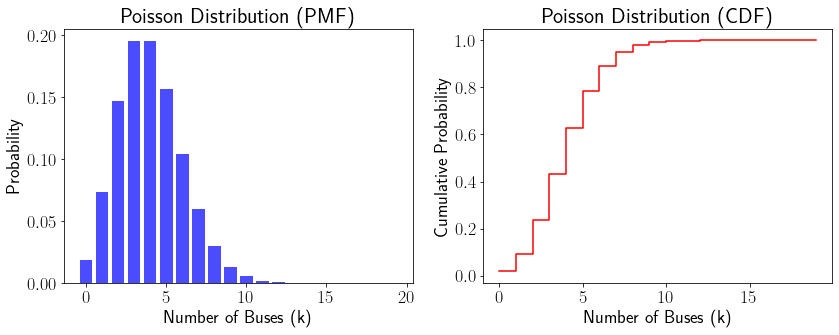

In [62]:
# Parameters for the Poisson distribution
lambda_ = 4  # average rate (e.g., 4 buses per hour)
k = np.arange(0, 20)  # range of k values (number of buses)

# Probability Mass Function (PMF) for the Poisson distribution
pmf = poisson.pmf(k, lambda_)

# Cumulative Distribution Function (CDF) for the Poisson distribution
cdf = poisson.cdf(k, lambda_)

# Creating the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the PMF
axes[0].bar(k, pmf, color='blue', alpha=0.7)
axes[0].set_title('Poisson Distribution (PMF)')
axes[0].set_xlabel('Number of Buses (k)')
axes[0].set_ylabel('Probability')

# Plotting the CDF
axes[1].step(k, cdf, color='red', where='post')
axes[1].set_title('Poisson Distribution (CDF)')
axes[1].set_xlabel('Number of Buses (k)')
axes[1].set_ylabel('Cumulative Probability')

# Show the plots
plt.tight_layout()
plt.show()

## Poisson Distribution

The Geometric Distribution models the number of trials needed to get the first success in a series of independent Bernoulli trials, each with the same probability of success. It's commonly used in scenarios where you're interested in finding out how many attempts are required to achieve a success.


Let's consider a scenario in a game where a player has a 20% chance (probability = 0.20) of winning on any given try. The Geometric Distribution can model the probability of the player winning for the first time on the 1st, 2nd, 3rd try, and so on.

Now, let's plot the Probability Mass Function (PMF) and Cumulative Distribution Function (CDF) for this scenario:

The PMF will show the probability that the player wins for the first time on the 1st, 2nd, 3rd try, etc.
The CDF will show the cumulative probability that the player wins for the first time on or before the 1st, 2nd, 3rd try, etc.